In [25]:
#import all of basic lib

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras import utils

#importattion du modèle séquentiel
from tensorflow.keras.models import Sequential
#importation des couches utilisées pour le CNN
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend

In [15]:
 #unzip and load dataset, once
"""from zipfile import ZipFile

with ZipFile(
    '/content/drive/MyDrive/Malaria-dataset/dataset-malaria-gr.zip',
    'r'
) as zip:
  zip.extractall('/content/drive/MyDrive/Malaria-dataset')"""

In [17]:
#check all dispo dir
os.listdir('/content/drive/MyDrive/Malaria-dataset')

['dataset-malaria-gr.zip', 'Parasitized', 'Uninfected']

In [18]:
#check Parasitized data image in index 0
os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')[0]

'C100P61ThinF_IMG_20150918_145609_cell_150.png'

In [19]:
#check Uninfected data image in index 0 and its len
print(os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')[10])
print('length = ', len(os.listdir('Uninfected')))

C101P62ThinF_IMG_20150923_170246_cell_19.png
length =  13780


In [20]:
#Combine all the images in one variable and simultaneously resize all image to  50, 50
parasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')
unParasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')
dataArrayImage = []
labels = []

for img in parasitezedData:
  try:
    imgRead = plt.imread('/content/drive/MyDrive/Malaria-dataset/Parasitized/' + img)
    imgResize = cv2.resize(imgRead, (50, 50))
    imgArray = img_to_array(imgResize)
    dataArrayImage.append(imgArray)
    labels.append(1)
  except:
    None

for img in parasitezedData:
  try:
    imgRead = plt.imread('/content/drive/MyDrive/Malaria-dataset/Uninfected/' + img)
    imgResize = cv2.resize(imgRead, (50, 50))
    imgArray = img_to_array(imgResize)
    dataArrayImage.append(imgArray)
    labels.append(1)
  except:
    None

In [21]:
# load array as np array for all task
imageData = np.array(dataArrayImage)
labels = np.array(labels)
#test
print("imageData:",len(imageData))
print("labels:",len(labels))


imageData: 13779
labels: 13779


Parasitized Sample:



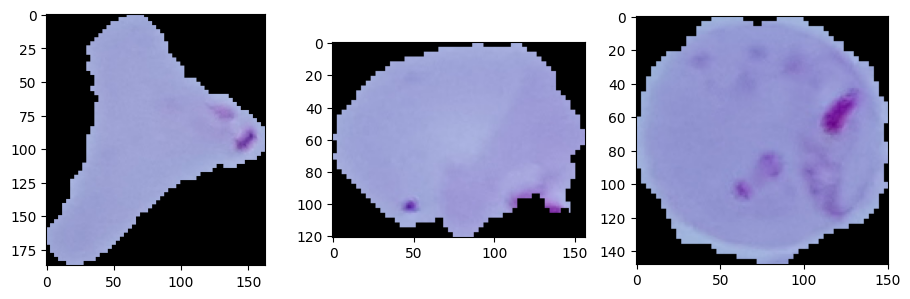

Uninfected Sample:



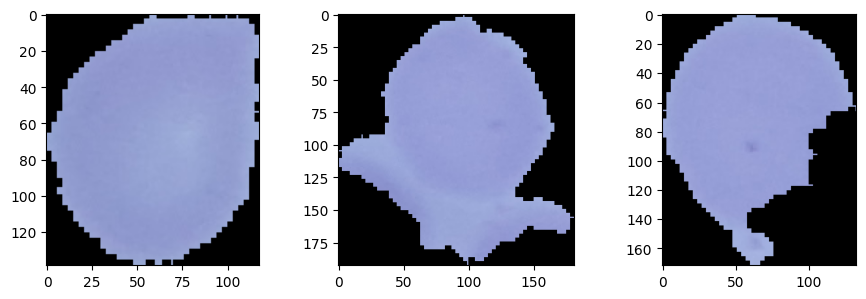

In [22]:
#data viz
print("3 Parasitized :\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Parasitized/'+ parasitezedData[i])
    plt.imshow(img)
plt.show()

print("3 Uninfected:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Uninfected/'+ unParasitezedData[i])
    plt.imshow(img)
plt.show()

In [24]:
#prepa train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imageData, labels, test_size = 0.2,random_state = 0)

# classification des resultats en deux classes différentes.
y_train = utils.to_categorical(y_train, num_classes = 2)
y_test = utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 11023
X_test: 2756
y_train: 11023
y_test: 2756


In [26]:
#Use the CNN model

# Initialisation du model Sequential 
model = Sequential()

inputShape = (50, 50, 3) # ici on indique la forme d'entrée du modèle (une donnée image de 50*50px avec 3 canaux de couleur) 

if backend.image_data_format() == 'channels_first':
  inputShape = (3, 50, 50)

# on répète 3 fois le bloc de convolution pooling, normalisation et dropout pour
# pour extraire des kk à différents niveaux d'abstraction.  
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

#mettre la couche flatten (applatissement)
#objectif : applatisse les données pour les préparer à être connectées à une couche Dense
model.add(Flatten())

# ajout de couche dense à 512 neurones à la couche précédente (flatten)
# activation relu (Rectified Linear Unit) pour introduire la non-linéarité dans le modèle
model.add(Dense(512, activation = 'relu'))

# couche de normalisation (normalisation par lot ~ BatchNormalization)

model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0

In [28]:
#Compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
#model fitting
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
345/345 [==============================] - 40s 108ms/step - loss: 0.2177 - accuracy: 0.9138
Epoch 2/30
345/345 [==============================] - 38s 111ms/step - loss: 0.0078 - accuracy: 0.9993
Epoch 3/30
345/345 [==============================] - 38s 111ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 4/30
345/345 [==============================] - 39s 113ms/step - loss: 9.8896e-04 - accuracy: 1.0000
Epoch 5/30
345/345 [==============================] - 38s 111ms/step - loss: 5.9361e-04 - accuracy: 0.9999
Epoch 6/30
345/345 [==============================] - 37s 107ms/step - loss: 3.7154e-04 - accuracy: 1.0000
Epoch 7/30
345/345 [==============================] - 36s 104ms/step - loss: 2.1928e-04 - accuracy: 1.0000
Epoch 8/30
345/345 [==============================] - 38s 110ms/step - loss: 1.4874e-04 - accuracy: 1.0000
Epoch 9/30
345/345 [==============================] - 38s 111ms/step - loss: 1.6421e-04 - accuracy: 1.0000
Epoch 10/30
345/345 [============================

In [30]:
#evaluation

predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

87/87 [==============================] - 2s 21ms/step - loss: 1.3379e-07 - accuracy: 1.0000
Loss:  1.3378603114233556e-07
Accuracy:  100.0


In [35]:
#Saving model
%cd "/content/drive/MyDrive/Malaria-dataset"
model.save('model_malaria_version_1_00.h5')
from tensorflow.keras.models import load_model
model = load_model('model_malaria_version_1_00.h5')
model.summary()

/content/drive/MyDrive/Malaria-dataset
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 